In [811]:
import numpy as np
import matplotlib.pyplot as plt

In [812]:
def softmax(t):
    res = np.exp(t)
    return res / np.sum(res)

def relu(t):
    return np.maximum(t, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

def relu_deriv(t):
    return (t>=0).astype(float)

def to_one_hot_encoding(y, dim = 10):
    res = np.zeros([1, dim])
    res[0][y] = 1
    return res


class Perceptron:
    def __init__(self, input_dim, h1_dim, out_dim, learn_rate = 0.01):
        self.input_dim = input_dim
        self.h1_dim = h1_dim
        self.out_dim = out_dim
        self.learn_rate = learn_rate

        self.t1 = np.zeros([1, self.h1_dim])
        self.h1 = np.zeros([1, self.h1_dim])
        self.t2 = np.zeros([1, self.out_dim])
        self.out = np.zeros([1, self.out_dim])

        self.w1 = np.random.rand(self.input_dim, self.h1_dim) - 0.5
        self.b1 = np.random.rand(1, self.h1_dim) - 0.5
        self.w2 = np.random.rand(self.h1_dim, self.out_dim) - 0.5
        self.b2 = np.random.rand(1, self.out_dim) - 0.5
        self.drop_gradients()


    def drop_gradients(self):
        self.dE_dw1 = np.zeros((self.input_dim, self.h1_dim))
        self.dE_db1 = np.zeros((1, self.h1_dim))
        self.dE_dw2 = np.zeros((self.h1_dim, self.out_dim))
        self.dE_db2 = np.zeros((1, self.out_dim))


    def run(self, data, activation_function):
        self.t1 = data * self.w1 + self.b1
        self.h1 = activation_function(self.t1)
        self.t2 = self.h1 @ self.w2 + self.b2
        self.out = self.t2
        return self.out


    def calculate_gradient(self, data, right_out, activation_deriv):
        dE_dt2 = 2*(self.out - right_out)
        self.dE_dw2 += self.h1.T @ dE_dt2
        self.dE_db2 += dE_dt2

        dE_dh1 = dE_dt2 @ self.w2.T
        dE_dt1 = dE_dh1 * activation_deriv(self.t1)
        self.dE_dw1 += data * dE_dt1
        self.dE_db1 += dE_dt1


    def apply_gradient(self, batch_size=1):
        self.w1 -= self.learn_rate * self.dE_dw1 / batch_size
        self.w2 -= self.learn_rate * self.dE_dw2 / batch_size
        self.b1 -= self.learn_rate * self.dE_db1 / batch_size
        self.b2 -= self.learn_rate * self.dE_db2 / batch_size

        self.drop_gradients()



In [821]:
def train_model(model, X_train, y_train, X_test, y_test):
    for epoch in range (1, 200):
        loss = 0
        inner_counter = 1
        for i in np.random.permutation(len(X_train)):
            prediction = model.run(data=X_train[i].flatten(), activation_function=relu)
            loss += np.sum(np.square(y_train[i] - prediction))/len(prediction)
            model.calculate_gradient(data=X_train[i].flatten(), right_out=y_train[i], activation_deriv=relu_deriv)
            if inner_counter % 10 == 0:
                model.apply_gradient()
            inner_counter += 1

        test_loss = 0
        # for i in range(0, 10000):
        #     prediction = np.argmax(model.run(data=X_test[i], activation_function=relu))
        #     test_loss += (y_test[i] - prediction) ** 2
        print(f"Epoch №{epoch} finished with accuracy {round(loss/len(X_train) * 100, 2)}% Test dataset accuracy {round(test_loss/len(X_train) * 100, 2)}")


In [825]:
import pandas as pd
dataframe_sorb = pd.read_excel('Silica-loc-isoth1.xlsx', header=None, sheet_name="Adsorption")
X_train = []
y_train = []
pore_N = dataframe_sorb.shape[1]
for i in range(1, pore_N):
    y_train.append(np.array(dataframe_sorb[i][21:]))
X_train = np.array(dataframe_sorb.iloc[0][1:])
x_scale = np.max(X_train)
y_scale = np.max(y_train)
X_train = X_train / x_scale
y_train = y_train / y_scale

In [826]:
np.random.seed(0)
model = Perceptron(input_dim=1, h1_dim=10, out_dim=len(y_train[0]))

In [827]:
train_model(model, X_train, y_train, X_train, y_train)

Epoch №1 finished with accuracy 1629.29% Test dataset accuracy 0.0
Epoch №2 finished with accuracy 519.18% Test dataset accuracy 0.0
Epoch №3 finished with accuracy 518.27% Test dataset accuracy 0.0
Epoch №4 finished with accuracy 520.82% Test dataset accuracy 0.0
Epoch №5 finished with accuracy 515.34% Test dataset accuracy 0.0
Epoch №6 finished with accuracy 517.29% Test dataset accuracy 0.0
Epoch №7 finished with accuracy 515.37% Test dataset accuracy 0.0
Epoch №8 finished with accuracy 517.49% Test dataset accuracy 0.0
Epoch №9 finished with accuracy 513.3% Test dataset accuracy 0.0
Epoch №10 finished with accuracy 516.63% Test dataset accuracy 0.0
Epoch №11 finished with accuracy 517.48% Test dataset accuracy 0.0
Epoch №12 finished with accuracy 516.28% Test dataset accuracy 0.0
Epoch №13 finished with accuracy 518.08% Test dataset accuracy 0.0
Epoch №14 finished with accuracy 519.77% Test dataset accuracy 0.0
Epoch №15 finished with accuracy 517.67% Test dataset accuracy 0.0
Epoc

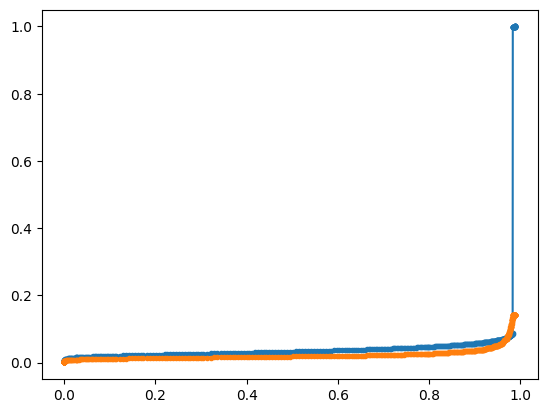

In [829]:
i = -1
right_answer = model.run(data=X_train[i].flatten(), activation_function=relu)
dataframe_sorb = pd.read_excel('Silica-loc-isoth1.xlsx', header=None, sheet_name="Adsorption")
data_sorb = dataframe_sorb.to_numpy()
pressures_d = data_sorb[:, 0][21:]
plt.plot(pressures_d, y_train[i], marker=".")
plt.plot(pressures_d, right_answer.reshape(458, 1) * y_scale , marker=".")
plt.show()